## undercomplete autoencoder - implementation
(no regularization)

- Basic Keras code
- Use of MNIST dataset
- encode, reconstruction
- anomaly detection (image)

In [1]:
import keras
from keras import layers

This is our size of `input` image

In [2]:
input_img = keras.Input(shape=(784,))

This is the size of our `encoded representations`
- 32 floats  
- compression of factor 24.5, assuming the input is 784 floats

In [3]:
encoding_dim = 32  

`Encoder layer`

In [4]:
encoded = layers.Dense(encoding_dim, 
                       activation='relu')(input_img)

`decoder layer`

In [5]:
decoded = layers.Dense(units=784, 
                       activation='sigmoid')(encoded)

`model` of AE

In [6]:
autoencoder = keras.Model(input_img, decoded)

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [8]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [9]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [10]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

we're discarding the labels (since we're only interested in encoding/decoding the input images).

In [12]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.

In [13]:
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train.shape[1:]

(28, 28)

In [16]:
x_test.shape

(10000, 28, 28)

In [17]:
np.prod(x_train.shape[1:])

784

In [18]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test),   np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [19]:
autoencoder.fit(x_train, 
                x_train,
                epochs=50,
                batch_size=256,
                shuffle   =True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2773 - val_loss: 0.1888
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1688 - val_loss: 0.1513
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1425 - val_loss: 0.1325
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1276 - val_loss: 0.1204
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1174 - val_loss: 0.1119
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1102 - val_loss: 0.1060
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1051 - val_loss: 0.1018
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1016 - val_loss: 0.0989
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0990 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0973 - val_loss: 0.0953

In [20]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 876us/step


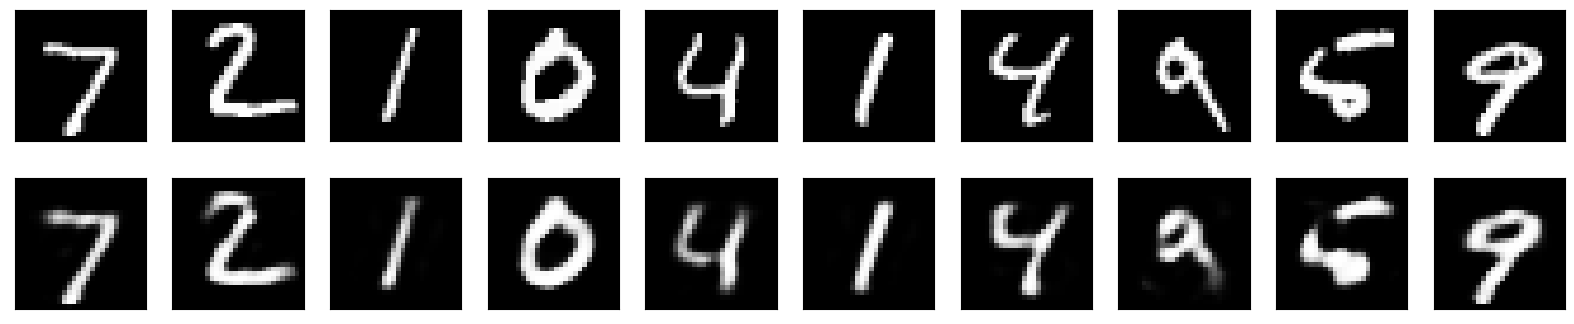

In [21]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)